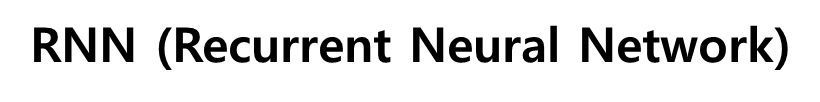

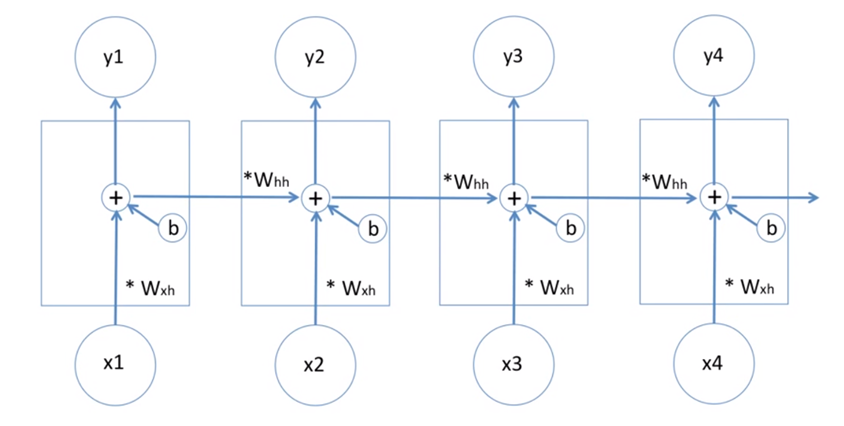

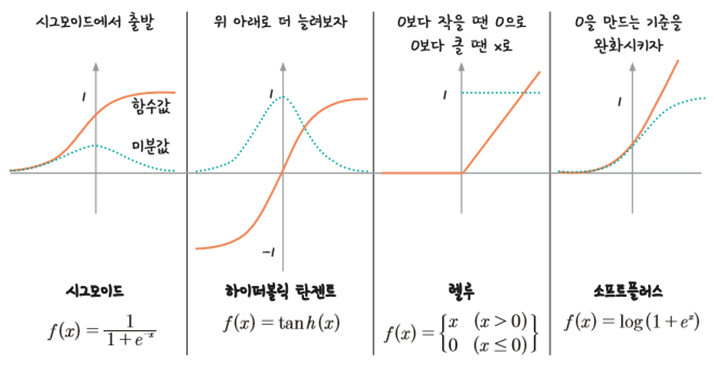

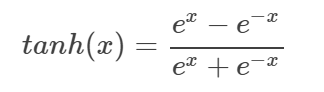

### one cell: 4 input-dim, 2 hidden size

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model

print(tf.__version__)
tf.enable_eager_execution()

1.13.1


In [2]:
x_data = np.array([[[1,0,0,0]]], dtype=np.float32)      # 3차원
rnn = layers.SimpleRNN(units=2, return_sequences=True,  # activation: default='tanh'
                       kernel_initializer='ones',       # W
                       bias_initializer='zeros',
                       return_state=True)

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[0.7615942 0.7615942]]], shape: (1, 1, 2)
states: [[0.7615942 0.7615942]], shape: (1, 2)


In [3]:
rnn.get_weights()

[array([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], dtype=float32), array([[ 0.02847731,  0.99959445],
        [-0.99959445,  0.02847731]], dtype=float32), array([0., 0.], dtype=float32)]

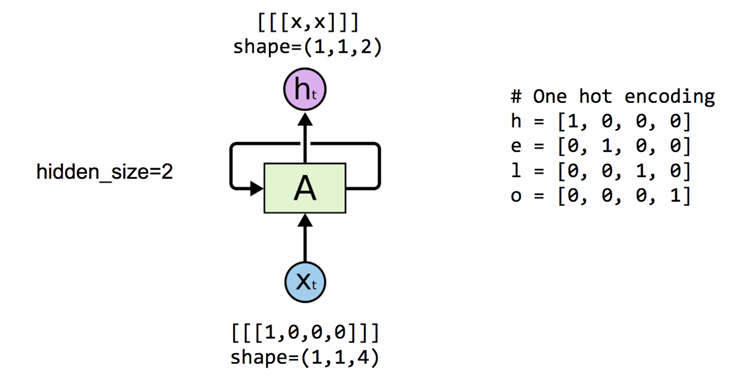

In [4]:
# equivalent to above case

rnn = layers.SimpleRNN(units=2, return_sequences=True,
                      return_state=True)                 #layers.SimpleRNNCell + layers.RNN

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[0.23339087 0.5793168 ]]], shape: (1, 1, 2)
states: [[0.23339087 0.5793168 ]], shape: (1, 2)


In [5]:
rnn.get_weights()

[array([[ 0.2377727 ,  0.6614337 ],
        [ 0.1103673 , -0.29398632],
        [ 0.5107837 , -0.07725358],
        [-0.910079  ,  0.97031593]], dtype=float32),
 array([[ 0.6805688 , -0.732684  ],
        [-0.732684  , -0.68056893]], dtype=float32),
 array([0., 0.], dtype=float32)]

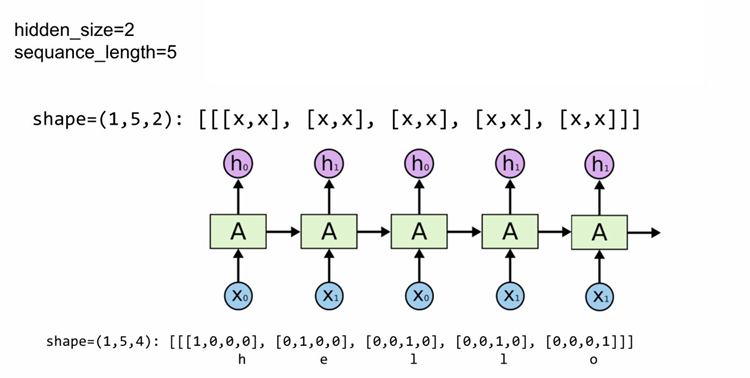

In [7]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

x_data = np.array([[h, e, l, l, o]], dtype=np.float32)

hidden_size = 2

rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4)
outputs: [[[-0.22372128  0.7527158 ]
  [-0.73099095  0.09387433]
  [-0.8852548  -0.84066665]
  [-0.8085767  -0.9721119 ]
  [ 0.44978806 -0.97388124]]], shape: (1, 5, 2)
states: [[ 0.44978806 -0.97388124]], shape: (1, 2)


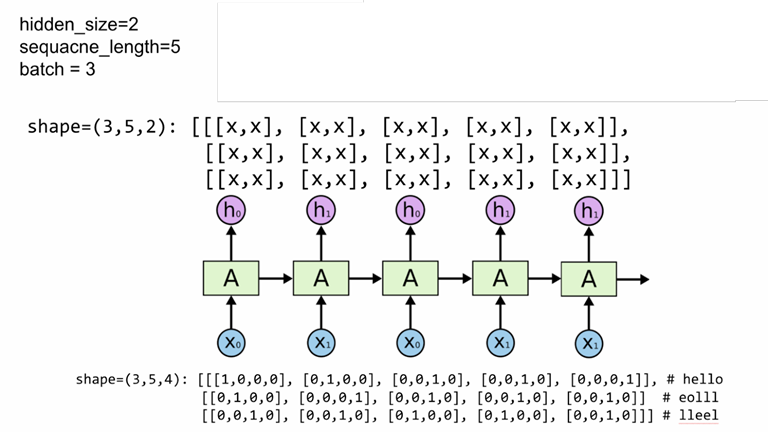

In [8]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2

rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4)
outputs: [[[ 0.35874426  0.7585076 ]
  [ 0.10721732  0.4818976 ]
  [-0.82820517  0.56938624]
  [-0.53971654 -0.09328055]
  [ 0.04857124 -0.12574933]]

 [[ 0.7189229   0.65580004]
  [-0.876433    0.26768336]
  [-0.33751926  0.07836714]
  [-0.5253191   0.53728205]
  [-0.6574854   0.14761639]]

 [[-0.64014375  0.71606684]
  [-0.6855547  -0.05746796]
  [ 0.88915694  0.3153119 ]
  [ 0.06558836  0.8382863 ]
  [-0.88811356  0.3554399 ]]], shape: (3, 5, 2)
states: [[ 0.04857124 -0.12574933]
 [-0.6574854   0.14761639]
 [-0.88811356  0.3554399 ]], shape: (3, 2)


## RNN many to one
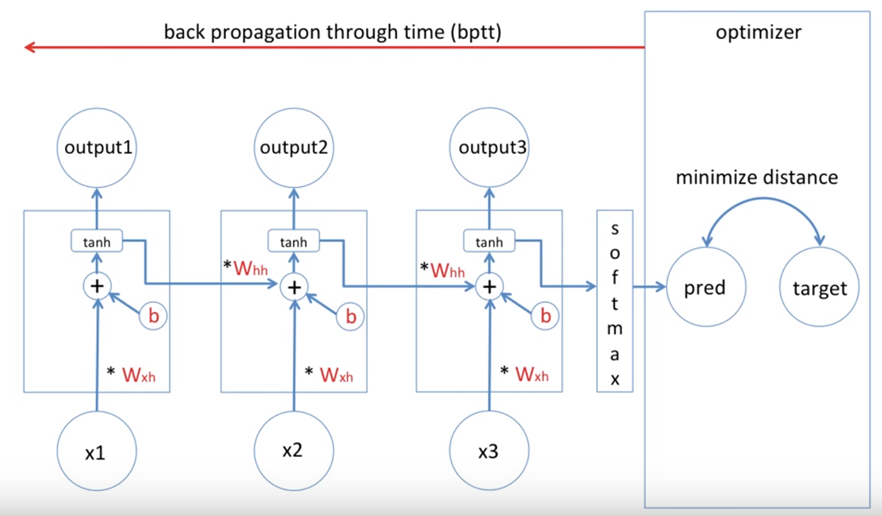

### RNN basic create model

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

print(tf.__version__)
tf.enable_eager_execution()

1.13.1


In [10]:
max_sequence = 4  # 문장 최대 단어 수
X_train = ['Traffic ticket fines', 'Traffic condition is fine']  # 긍정/부정 판별할 문장
Y_train = [0,1]  # 판별 결과(부정0, 긍정1)

X_train

['Traffic ticket fines', 'Traffic condition is fine']

In [11]:
tokenizer = Tokenizer()   # X_train의 단어들을 숫자로 변환시키는 객체
tokenizer.fit_on_texts(X_train)
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_train_tokens

[[1, 2, 3], [1, 4, 5, 6]]

In [22]:
tokenizer.word_index

{'traffic': 1, 'ticket': 2, 'fines': 3, 'condition': 4, 'is': 5, 'fine': 6}

In [12]:
tokenizer.word_index.items()

dict_items([('traffic', 1), ('ticket', 2), ('fines', 3), ('condition', 4), ('is', 5), ('fine', 6)])

In [18]:
dict(map(reversed, [(1, 'a'), (2, 'b')]))

{'a': 1, 'b': 2}

In [14]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
reverse_word_map

{1: 'traffic', 2: 'ticket', 3: 'fines', 4: 'condition', 5: 'is', 6: 'fine'}

In [21]:
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_sequence, padding='post')
# X_train_tokens에서 max_sequence(4)보다 단어 수가 적은 문장에 0을 추가해서 문장 단어수를 4로 맞춰줌
X_train_pad

array([[1, 2, 3, 0],
       [1, 4, 5, 6]])

In [25]:
vocab_size = len(tokenizer.word_index) + 1  # 학습 데이터 전체 단어 수 + pad(0) 포함 1개 추가.
vocab_size  # 학습할 단어는 7개

7

In [27]:
one_hot = np.eye(vocab_size)
one_hot

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [28]:
model = Sequential()  # RNN 처리 위한 책체 Sequential을 변수 model에 저장

In [30]:
model.add(layers.Embedding(input_dim=vocab_size, output_dim=vocab_size,
                           input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 7)              49        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [31]:
matrix1 = model(X_train_pad)
matrix1

<tf.Tensor: id=642, shape=(2, 4, 7), dtype=float32, numpy=
array([[[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)>

In [32]:
hidden_size = 1  # RNN 출력 개수

model.add(layers.SimpleRNN(units=hidden_size))  # y1~y4 계산 실행하고 y4 출력 리턴

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 7)              49        
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 1)                 9         
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [33]:
matrix2 = model(X_train_pad)
matrix2

<tf.Tensor: id=933, shape=(2, 1), dtype=float32, numpy=
array([[-0.02573437],
       [ 0.37477595]], dtype=float32)>

In [34]:
num_classes = 2 # 분류 개수

model.add(layers.Dense(units=num_classes, activation=tf.nn.softmax))  # dense: mulit layer perceptron

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 7)              49        
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 1)                 9         
_________________________________________________________________
dense (Dense)                (None, 2)                 4         
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [35]:
matrix3 = model(X_train_pad)
matrix3

<tf.Tensor: id=1099, shape=(2, 2), dtype=float32, numpy=
array([[0.5007735 , 0.49922654],
       [0.48873752, 0.5112624 ]], dtype=float32)>

In [49]:
np.argmax(matrix3, axis=1)

array([0, 1], dtype=int64)

In [93]:
np.array([[[1], [2], [3]], [[4], [5], [6]]]).shape

(2, 3, 1)

In [94]:
np.argmax(np.array([[[1], [2], [3]], [[4], [5], [6]]]), axis=0)

array([[1],
       [1],
       [1]], dtype=int64)

In [95]:
np.argmax(np.array([[[1], [2], [3]], [[4], [5], [6]]]), axis=1)

array([[2],
       [2]], dtype=int64)

In [59]:
np.argmax(np.array([[[1], [2], [3]], [[4], [5], [6]]]), axis=-1)

array([[0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [61]:
np.argmax(np.array([[[1], [2], [3]], [[4], [5], [6]]]), axis=2)

array([[0, 0, 0],
       [0, 0, 0]], dtype=int64)

### RNN sentiment

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

max_sequence = 4  # 문장 최대 단어 수
X_train = ['Traffic ticket fines', 'Traffic condition is fine']  # 긍정/부정 판별할 문장
Y_train = [0,1]  # 판별 결과(부정0, 긍정1)

tokenizer = Tokenizer()   # X_train의 단어들을 숫자로 변환시키는 객체
tokenizer.fit_on_texts(X_train)
X_train_tokens = tokenizer.texts_to_sequences(X_train)  # [[1, 2, 3], [1, 4, 5, 6]]

reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

X_train_pad = pad_sequences(X_train_tokens, maxlen=max_sequence, padding='post')  # padding 0을 뒤에 붙임.
# X_train_tokens에서 max_sequence(4)보다 단어 수가 적은 문장에 0을 추가해서 문장 단어수를 4로 맞춰줌
# [[1, 2, 3, 0], [1, 4, 5, 6]]

vocab_size = len(tokenizer.word_index) + 1  # 학습 데이터 전체 단어 수 + pad(0) 포함 1개 추가.
# 학습할 단어는 7개

one_hot = np.eye(vocab_size) # vocab_size의 경우의 수만큼 one hot 인코딩 생성

model = Sequential()  # RNN 처리 위한 책체 Sequential을 변수 model에 저장

model.add(layers.Embedding(input_dim=vocab_size, output_dim=vocab_size,
                           input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))
# 단어들을 one hot encoding하는 Embedding 객체 생성.
# input dim: 전체 단어 개수 7
# out dim: one hot encoding 배열 1개의 길이 7
# input length: 입력 단어의 수 4

hidden_size = 1  # RNN 출력 개수
model.add(layers.SimpleRNN(units=hidden_size))  # y1~y4 계산 실행하고 y4 출력 리턴

num_classes = 2 # 분류 개수
model.add(layers.Dense(units=num_classes, activation=tf.nn.softmax))  # dense: mulit layer perceptron

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 7)              49        
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 1)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4         
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [63]:
lr = .01 # learning rate
opt = tf.train.AdamOptimizer(learning_rate = lr)  #optimizer 선언

for step in range(10):
    with tf.GradientTape() as tape:
        hypothesis = model(X_train_pad) # 예측 결과
        cost = tf.losses.sparse_softmax_cross_entropy(labels=Y_train, logits=hypothesis) # 예측 결과의 cost
        
        yhat = np.argmax(hypothesis, axis=-1) # 예측값에서 가장 확률이 높은 col index 대입
        print('yhat:', yhat)
        
        accuracy = np.mean(yhat == Y_train) # yhat과 Y_train이 같으면 1, 아니면 0 리턴 -> 그것들의 평균
        
        # W와 b값들을 조정
        grads = tape.gradient(target=cost, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        
    print('step: {:3}, cost: {:.3f}, accuracy: {:.3f}'.format(step, cost, accuracy))

Instructions for updating:
Use tf.cast instead.
yhat: [1 0]
step:   0, cost: 0.695, accuracy: 0.000
yhat: [0 0]
step:   1, cost: 0.693, accuracy: 0.500
yhat: [0 0]
step:   2, cost: 0.692, accuracy: 0.500
yhat: [0 1]
step:   3, cost: 0.690, accuracy: 1.000
yhat: [0 1]
step:   4, cost: 0.688, accuracy: 1.000
yhat: [0 1]
step:   5, cost: 0.685, accuracy: 1.000
yhat: [0 1]
step:   6, cost: 0.682, accuracy: 1.000
yhat: [0 1]
step:   7, cost: 0.678, accuracy: 1.000
yhat: [0 1]
step:   8, cost: 0.673, accuracy: 1.000
yhat: [0 1]
step:   9, cost: 0.669, accuracy: 1.000


In [64]:
X_test = ['ticket is fine']
X_test_tokens = tokenizer.texts_to_sequences(X_test)
X_test_tokens

[[2, 5, 6]]

In [65]:
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_sequence, padding='post')
X_test_pad

array([[2, 5, 6, 0]])

In [66]:
yhat = model.predict(X_test_pad)
yhat

array([[0.53498316, 0.46501687]], dtype=float32)

In [68]:
yhat = np.argmax(yhat, axis=-1)
yhat

0

In [90]:
X_test = ['fines fine']
X_test_tokens = tokenizer.texts_to_sequences(X_test)

X_test_pad = pad_sequences(X_test_tokens, maxlen=max_sequence, padding='post')

yhat = model.predict(X_test_pad)
yhat = np.argmax(yhat, axis=-1)
yhat

array([1], dtype=int64)